# Usando perceptron de ScikitLearn

[PIMA INDIANS DIABETES DATASET](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

## obtencion de  datos


In [1]:
# carga los paquetes requeridos
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import fetch_openml # open machine learning

In [2]:
# cargamos el dataset de OpennML

diabetes = fetch_openml(name="diabetes", version=1, as_frame=True)
diabetes_dataframe = diabetes.frame

In [3]:
diabetes_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   preg    768 non-null    int64   
 1   plas    768 non-null    int64   
 2   pres    768 non-null    int64   
 3   skin    768 non-null    int64   
 4   insu    768 non-null    int64   
 5   mass    768 non-null    float64 
 6   pedi    768 non-null    float64 
 7   age     768 non-null    int64   
 8   class   768 non-null    category
dtypes: category(1), float64(2), int64(6)
memory usage: 49.0 KB


## Pre procesamiento

In [4]:
diabetes_dataframe

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,tested_negative
764,2,122,70,27,0,36.8,0.340,27,tested_negative
765,5,121,72,23,112,26.2,0.245,30,tested_negative
766,1,126,60,0,0,30.1,0.349,47,tested_positive


In [5]:
# separamos las características y la etiqueta
# obtener los X eliminando la columna etiqueta
X = diabetes_dataframe.drop(columns="class")
# obtener la etiqueta y convertirlo en un factor con funciones lambda
Y = diabetes_dataframe["class"].apply(lambda x: 1 if x == "tested_positive" else 0)

print(X, Y)


     preg  plas  pres  skin  insu  mass   pedi  age
0       6   148    72    35     0  33.6  0.627   50
1       1    85    66    29     0  26.6  0.351   31
2       8   183    64     0     0  23.3  0.672   32
3       1    89    66    23    94  28.1  0.167   21
4       0   137    40    35   168  43.1  2.288   33
..    ...   ...   ...   ...   ...   ...    ...  ...
763    10   101    76    48   180  32.9  0.171   63
764     2   122    70    27     0  36.8  0.340   27
765     5   121    72    23   112  26.2  0.245   30
766     1   126    60     0     0  30.1  0.349   47
767     1    93    70    31     0  30.4  0.315   23

[768 rows x 8 columns] 0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: class, Length: 768, dtype: category
Categories (2, int64): [0, 1]


In [6]:
# dividir el conjunto de datos en entrenamiento y prueba
# 80% de los datos se usan para entrenamiento y 20% para prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=26, stratify=Y
)

## Estandarizado

Estandarizar los datos muy dispersos, dejar todo en terminos de la función Z

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Entrenamiento del perceptrón

In [8]:
# crear y entrenar el modelo
perceptron = Perceptron(max_iter=1000, eta0=0.01, random_state=26)
perceptron.fit(X_train, Y_train) # esto es con lo que entrnas, y estas son las respuestas

Perceptron(eta0=0.01, random_state=26)

In [9]:
# predecir resultados
Y_prediction = perceptron.predict(X_test)

In [10]:
# evaluar la eficiencia
accuracy = accuracy_score(Y_test, Y_prediction)
print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 76.62%


In [11]:
# reporte
print("REPORTE DE CLASIFICACION")
print(classification_report(Y_test, Y_prediction))

REPORTE DE CLASIFICACION
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       100
           1       0.65      0.74      0.69        54

    accuracy                           0.77       154
   macro avg       0.75      0.76      0.75       154
weighted avg       0.78      0.77      0.77       154



## Viendo los pesos

In [12]:
# MATRICES DE PESOS
print(f"PESOS\n{perceptron.coef_}\nBIAS/SESGO\n{perceptron.intercept_}\nEPOCAS\n{perceptron.n_iter_}")

PESOS
[[ 0.01439627  0.05285947 -0.00581887  0.01734709 -0.00393253  0.01565109
   0.03479192  0.00115098]]
BIAS/SESGO
[-0.01]
EPOCAS
6


# GRAFICA DE FRONTERAS

In [13]:
import matplotlib.pyplot as plt

In [14]:
# seleccionar solo dos caracteristicas [glucosa e IMC]
X_subset = X_train[:, [1, 5]] # todas las filas y columnas 1 - 5
Y_subset = Y_train # todas las filas

In [15]:
perceptron.fit(X_subset, Y_subset)

Perceptron(eta0=0.01, random_state=26)

In [16]:
w = perceptron.coef_
b = perceptron.intercept_

In [17]:
# graficar la rectara 
# crear la linea de decision
# la funcion es w1*x1 + w2*x2 + b = 0
# despejando x2: x2 = (-w1/w2)*x1 - b/w2

x1_min, x1_max = X_subset[:, 0].min(), X_subset[:, 0].max()
x2_min, x2_max = X_subset[:, 1].min(), X_subset[:, 1].max()
x1_values = np.linspace(x1_min, x1_max, 100)  # rellenamos los valores para plotear
x2_values = (-w[0][0] / w[0][1]) * x1_values - b[0] / w[0][1]  # ecuacion de la recta


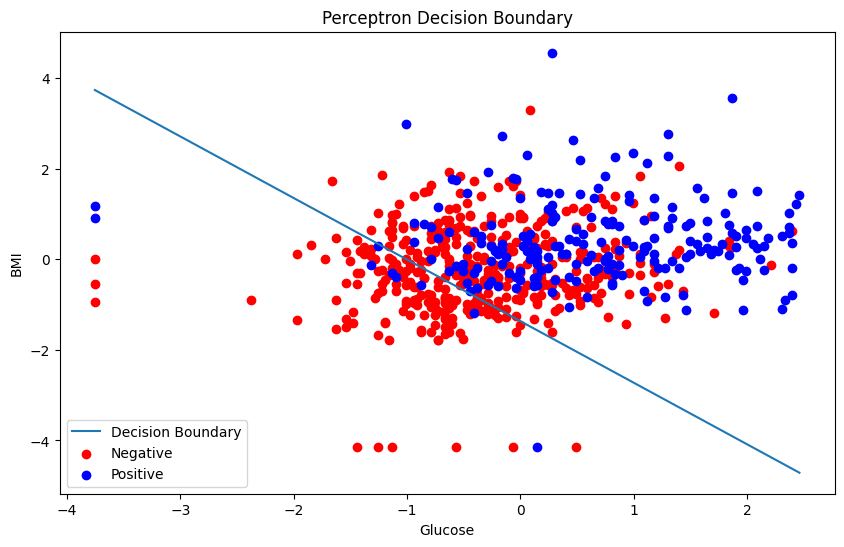

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(x1_values, x2_values, label="Decision Boundary")
plt.scatter(X_subset[Y_subset == 0][:, 0], X_subset[Y_subset == 0][:, 1], color="red", label="Negative")
plt.scatter(X_subset[Y_subset == 1][:, 0], X_subset[Y_subset == 1][:, 1], color="blue", label="Positive")
plt.xlabel("Glucose")
plt.ylabel("BMI")
plt.title("Perceptron Decision Boundary")
plt.legend()
plt.show()

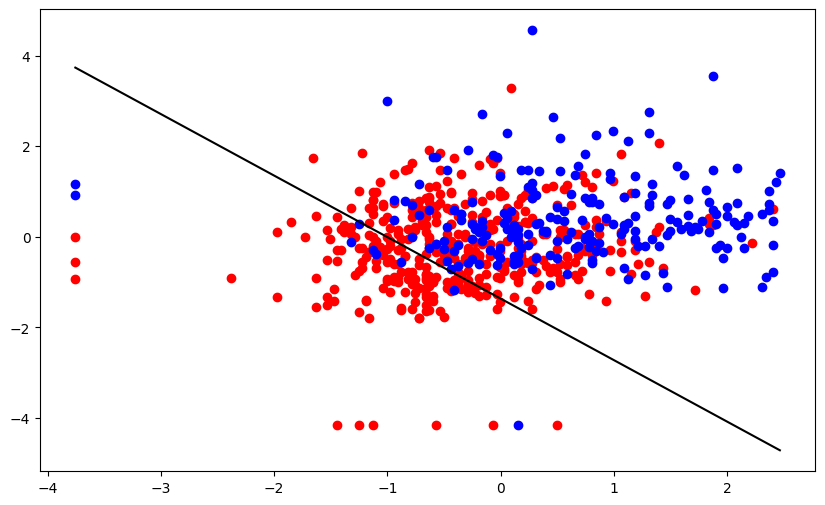

In [19]:
# graficar la rectara segun el inge
from cProfile import label


plt.figure(figsize=(10, 6))
plt.scatter(
    X_subset[Y_subset == 0][:, 0],
    X_subset[Y_subset == 0][:, 1],
    color="red",
    label="No diabetes",
)

plt.scatter(
    X_subset[Y_subset == 1][:, 0],
    X_subset[Y_subset == 1][:, 1],
    color="blue",
    label="diabetes",
)
plt.plot(x1_values, x2_values, "k-", label="Frontera de decision");